In [123]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
df = pd.read_csv('cleaned_chocolate_data.csv')
path = ...\6.1'

In [125]:
# Clean the data
df = df.dropna() 

In [126]:
df.head(20)

,company,specific_origin,ref,review_date,cocoa_percent,location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [127]:
df.dtypes

company             object
specific_origin     object
ref                  int64
review_date          int64
cocoa_percent       object
location            object
rating             float64
bean_type           object
bean_origin         object
dtype: object

In [128]:
df['cocoa_percent'] = df['cocoa_percent'].str.rstrip('%').astype(float)

In [129]:
df = df.dropna()

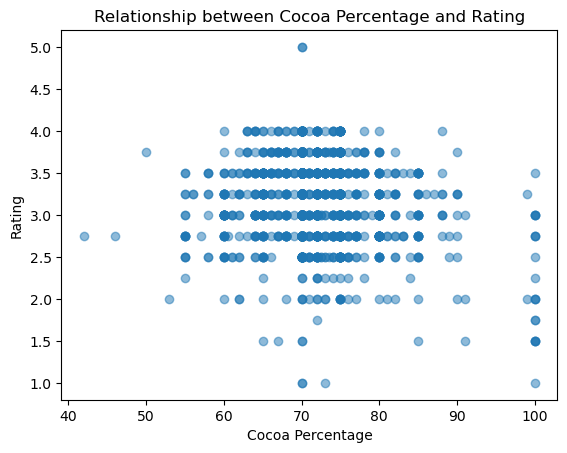

In [130]:
plt.scatter(df['cocoa_percent'], df['rating'], alpha=0.5)
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.title('Relationship between Cocoa Percentage and Rating')
plt.show()

In [135]:
# Define the independent (X) and dependent (y) variables
X = df[['cocoa_percent']].values  # Independent variable (Cocoa Percentage)
y = df['rating'].values           # Dependent variable (Rating)

In [137]:
# Split data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
# Predict ratings for the test set
y_pred = model.predict(X_test)

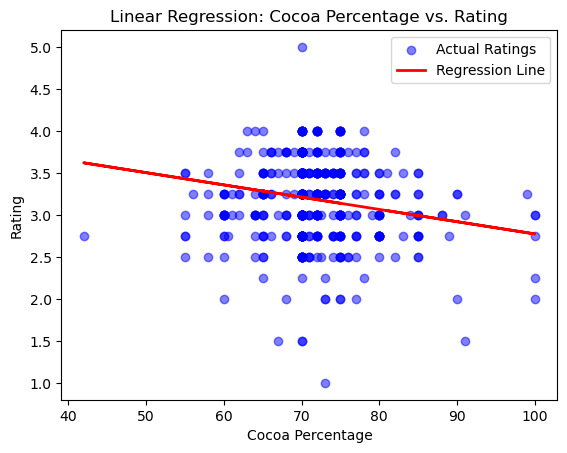

In [140]:
import matplotlib.pyplot as plt

# Plot actual test points and the predicted regression line
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Ratings')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.title('Linear Regression: Cocoa Percentage vs. Rating')
plt.legend()
plt.show()

In [141]:
# Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.22
R² Score: 0.00


In [142]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

   Actual  Predicted
0    3.00   3.138328
1    3.75   3.211284
2    3.50   3.211284
3    3.50   3.167511
4    3.00   3.211284


### **Interpretation of Model Performance**
The regression line does not fit the data well, as predicted values vary minimally around **

### **Model Performance Statistics**
- **MSE:** **0.22**  
- **R² Score:** **0.00**  
The model explains none of the variance in ratings, indicating poor performance.

### **Reflections on Data Bias**
- Limited variation in cocoa percentages (mostly **60% to 80%**).  
- Ratings are influenced by subjective taste preferences.  
- Omitted variables (e.g., `bean_origin`) may explain more variance.